<a href="https://colab.research.google.com/github/swarubm/msg-spam-or-not-/blob/main/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')


In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df.shape

(5572, 5)

# cleaning data
#eda
# txt preprocess
#model building
#evaluation
#improvements
#deplouy
# website

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# it shows that unnamed columns having most null values thats why we are dropping them

In [19]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [20]:
df.sample(6)

,v1,v2
4122,ham,"Cool, want me to go to kappa or should I meet ..."
5241,ham,Its a part of checking IQ
1800,ham,excellent. I spent &lt;#&gt; years in the Ai...
1764,spam,Hi 07734396839 IBH Customer Loyalty Offer: The...
4313,ham,Is ur changes 2 da report big? Cos i've alread...
2438,ham,I not busy juz dun wan 2 go so early.. Hee..


we should change the column name bcz v1 and v2 is confusing

In [21]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [22]:
df.sample(3)

,target,text
4233,ham,Now only i reached home. . . I am very tired n...
3860,spam,Free Msg: Ringtone!From: http://tms. widelive....
2838,ham,"Easy mate, * guess the quick drink was bit amb..."


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [29]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

it cnverted words into binary numbers

In [30]:
df['target']=encoder.fit_transform(df['target'])

In [31]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
df.isnull().sum()

,0
target,0
text,0


check for null values

In [33]:
df.duplicated().sum()

np.int64(403)

check for duplicated value

In [34]:
df = df.drop_duplicates(keep='first')

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.shape

(5169, 2)

# EDA

In [37]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
df['target'].value_counts()

,count
target,
0,4516
1,653


([<matplotlib.patches.Wedge at 0x7fc0780c8a40>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

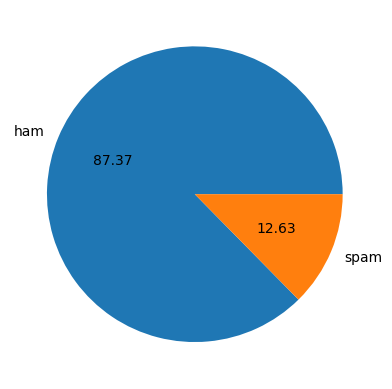

In [39]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

#from this pie chart we can see data imbalance

In [40]:
import nltk

In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [44]:
df['text'].apply(len)

,text
0,111
1,29
2,155
3,49
4,61
...,...
5567,161
5568,37
5569,57
5570,125


In [45]:
df['num_char'] = df['text'].apply(len)

/tmp/ipython-input-3778023891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char'] = df['text'].apply(len)


In [50]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
df['text'].apply(lambda x: tokenizer.tokenize(x))

,text
0,"[Go, until, jurong, point, crazy, Available, o..."
1,"[Ok, lar, Joking, wif, u, oni]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, U, c, already, t..."
4,"[Nah, I, don, t, think, he, goes, to, usf, he,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, Ì_, b, going, to, esplanade, fr, home]"
5569,"[Pity, was, in, mood, for, that, So, any, othe..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [51]:
df['text'].apply(lambda x:len(tokenizer.tokenize(x)))

,text
0,20
1,6
2,33
3,11
4,14
...,...
5567,33
5568,8
5569,10
5570,27


In [52]:
df['num_words'] = df['text'].apply(lambda x:len(tokenizer.tokenize(x)))

/tmp/ipython-input-2770600515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(tokenizer.tokenize(x)))


In [53]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14
